/home/rcalabro/codebase/senac-ia/machine-learning/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


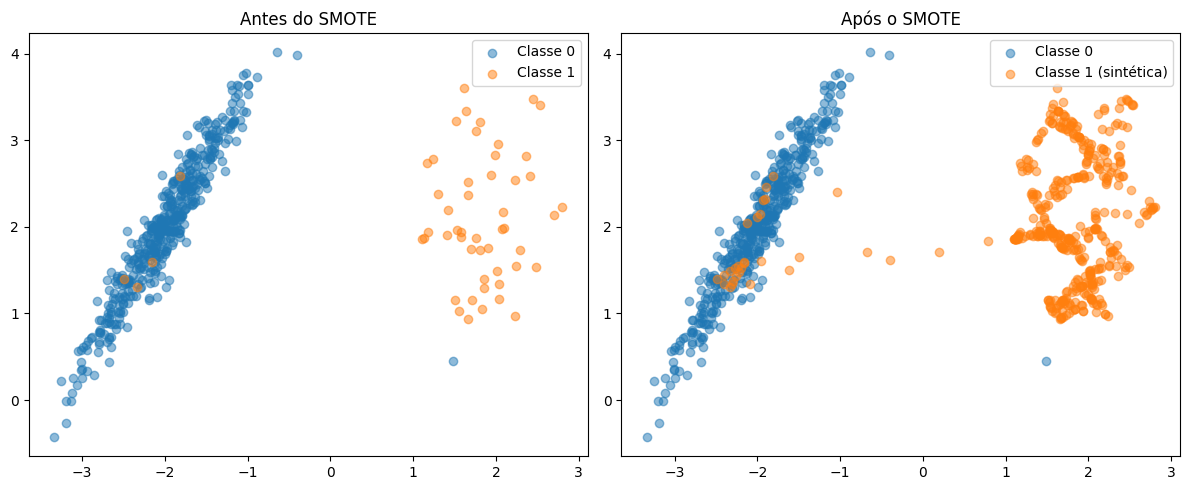

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Gerar dados desequilibrados
X, y = make_classification(n_samples=500, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9, 0.1],
                           class_sep=2)

# Aplicar SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

# Plotar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Classe 0', alpha=0.5)
ax1.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Classe 1', alpha=0.5)
ax1.set_title("Antes do SMOTE")
ax1.legend()

ax2.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label='Classe 0', alpha=0.5)
ax2.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label='Classe 1 (sintética)', alpha=0.5)
ax2.set_title("Após o SMOTE")
ax2.legend()

plt.tight_layout()
plt.show()


/home/rcalabro/codebase/senac-ia/machine-learning/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/rcalabro/codebase/senac-ia/machine-learning/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/rcalabro/codebase/senac-ia/machine-learning/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scik

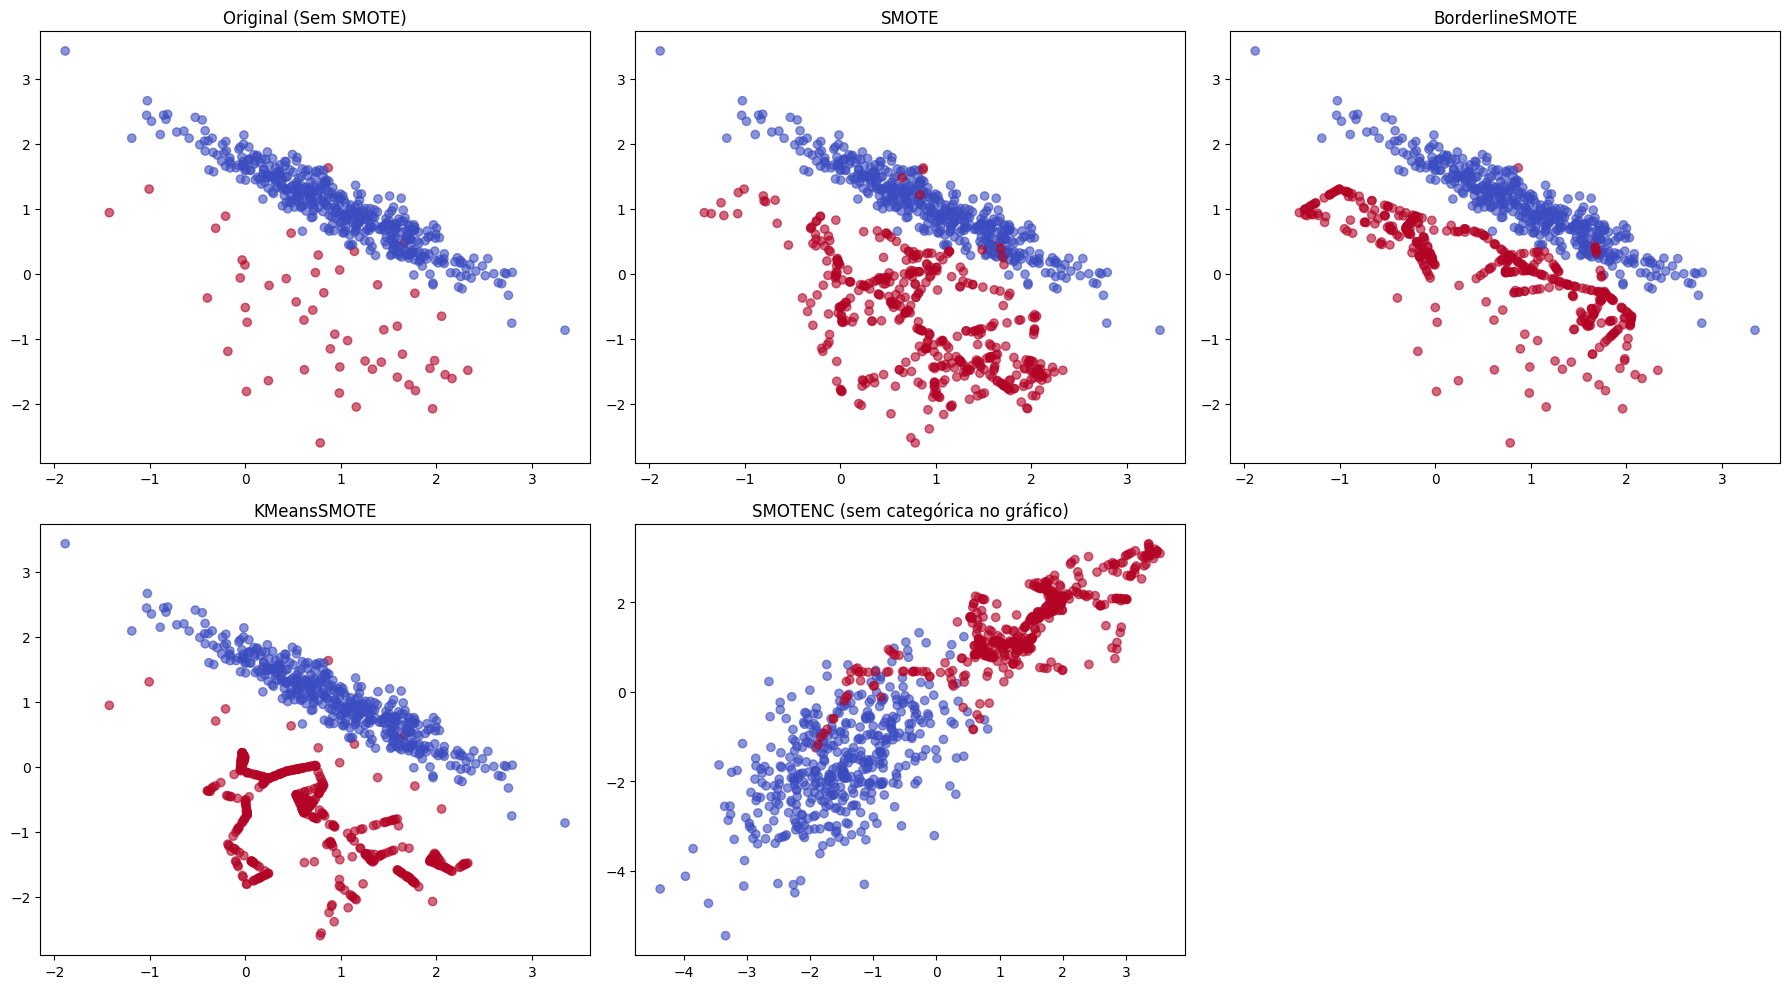

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, KMeansSMOTE, SMOTENC

# Dados numéricos base
X_base, y_base = make_classification(n_samples=500, n_features=2,
                                     n_informative=2, n_redundant=0,
                                     weights=[0.9, 0.1], class_sep=1.0,
                                     n_clusters_per_class=1)

# Aplicar SMOTE
X_smote, y_smote = SMOTE().fit_resample(X_base, y_base)

# Aplicar BorderlineSMOTE
X_bsmote, y_bsmote = BorderlineSMOTE().fit_resample(X_base, y_base)

# Aplicar KMeansSMOTE
X_ksmote, y_ksmote = KMeansSMOTE().fit_resample(X_base, y_base)

# SMOTENC: 1 categórica + 2 numéricas
X_nc, y_nc = make_classification(n_samples=500, n_features=3,
                                 n_informative=2, n_redundant=0,
                                 weights=[0.9, 0.1], class_sep=1.5,
                                 n_clusters_per_class=1)
X_nc[:, 0] = (X_nc[:, 0] > X_nc[:, 0].mean()).astype(int)  # categórica binária
X_smotenc, y_smotenc = SMOTENC(categorical_features=[0]).fit_resample(X_nc, y_nc)

# Plot
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs[0, 0].scatter(X_base[:, 0], X_base[:, 1], c=y_base, cmap='coolwarm', alpha=0.6)
axs[0, 0].set_title('Original (Sem SMOTE)')

axs[0, 1].scatter(X_smote[:, 0], X_smote[:, 1], c=y_smote, cmap='coolwarm', alpha=0.6)
axs[0, 1].set_title('SMOTE')

axs[0, 2].scatter(X_bsmote[:, 0], X_bsmote[:, 1], c=y_bsmote, cmap='coolwarm', alpha=0.6)
axs[0, 2].set_title('BorderlineSMOTE')

axs[1, 0].scatter(X_ksmote[:, 0], X_ksmote[:, 1], c=y_ksmote, cmap='coolwarm', alpha=0.6)
axs[1, 0].set_title('KMeansSMOTE')

axs[1, 1].scatter(X_smotenc[:, 1], X_smotenc[:, 2], c=y_smotenc, cmap='coolwarm', alpha=0.6)
axs[1, 1].set_title('SMOTENC (sem categórica no gráfico)')

axs[1, 2].axis('off')  # espaço vazio

plt.tight_layout()
plt.show()
